In [1]:
import numpy as np
import pandas as pd

data=pd.read_csv("survey_results_public.csv")

data["r_user"]=data["HaveWorkedLanguage"].apply(lambda x:"R" in str(x).split('; '))
data["python_user"]=data["HaveWorkedLanguage"].apply(lambda x:"Python" in str(x).split('; '))

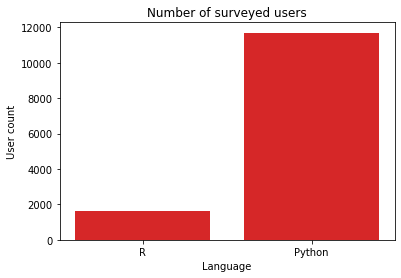

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pal=sns.color_palette()

fig,ax=plt.subplots()
plt.xlabel("Language")
plt.ylabel("User count")
plt.title("Number of surveyed users")
plt.bar([0,1],[data["r_user"].sum(),data["python_user"].sum()],color=pal[3])
ax.set_xticks([0,1])
ax.set_xticklabels(("R","Python"))
print()

Mean salary by language
lang
Both       63584.372432
Neither    54166.607159
Python     61481.626273
R          68205.555297
Name: Salary, dtype: float64


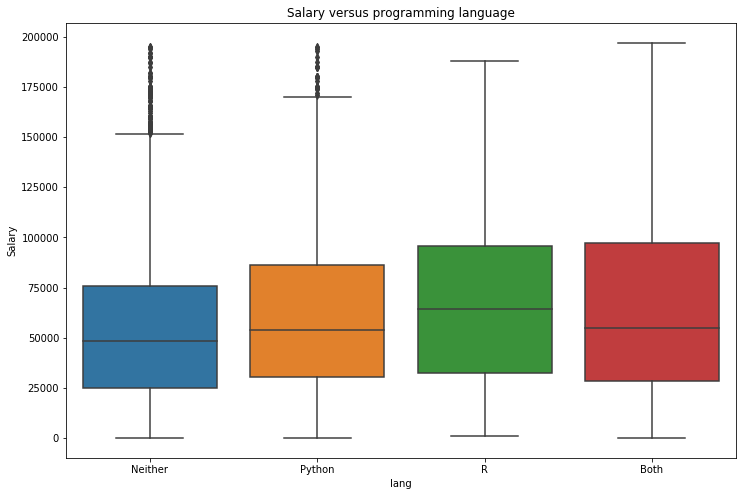

In [3]:
def langs(row):
    row=[int(i) for i in row.values]
    if sum(row)==2: return "Both"
    elif row[0]==1: return "R"
    elif row[1]==1: return "Python"
    else: return "Neither"
    
order=["Neither","Python","R","Both"]

data["lang"]=data[["r_user","python_user"]].apply(langs,axis=1)

plt.figure(figsize=(12,8))
sns.boxplot(x="lang",y="Salary",data=data,order=order)
plt.title("Salary versus programming language")
print("Mean salary by language")
print(data.groupby("lang")["Salary"].mean())

Mean of ideal workday start time
lang
Both       9.330993
Neither    9.427562
Python     9.579671
R          9.293624
Name: WorkStartProcessed, dtype: float64


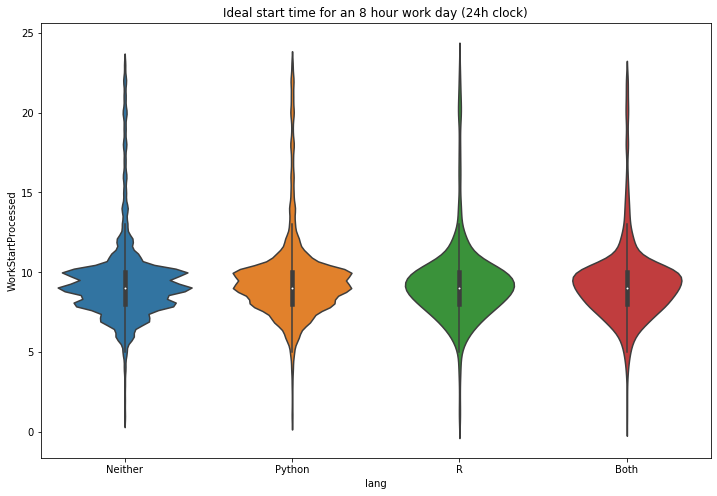

In [4]:
def parse_dates(date):
    date=str(date)
    if "Noon" in date:
        return 12.
    elif "AM" in date:
        return float(date.split(':')[0])
    elif "PM" in date:
        return float(date.split(':')[0])+12
    else:
        return np.nan
    
plt.figure(figsize=(12,8))
plt.title("Ideal start time for an 8 hour work day (24h clock)")
data["WorkStartProcessed"]=data["WorkStart"].apply(parse_dates)
sns.violinplot(x="lang",y="WorkStartProcessed",data=data,order=order)
print("Mean of ideal workday start time")
print(data.groupby("lang")["WorkStartProcessed"].mean())

In [6]:
#2
survey=pd.read_csv('survey_results_public.csv')

In [7]:
survey.shape

(51392, 154)

In [8]:
survey.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


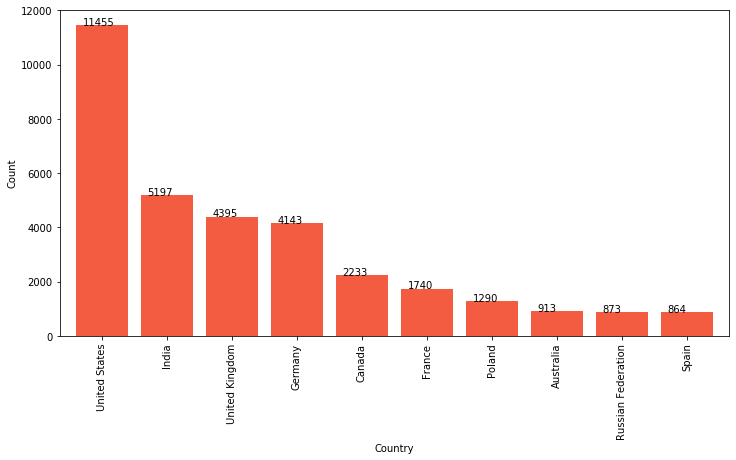

In [9]:
#Highest Surveyed Countries
plt.subplots(figsize=(12,6))
ax=survey["Country"].value_counts()[:10].plot.bar(width=0.8,color="#f45c42")
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.10,p.get_height()+0.25))
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

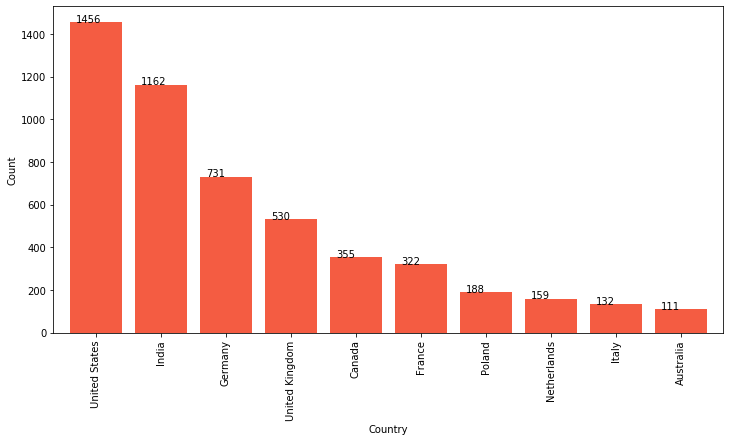

In [10]:
#Student Analysis
plt.subplots(figsize=(12,6))
students=survey[survey["Professional"]=="Student"]
ax=students["Country"].value_counts()[:10].plot.bar(width=0.8,color="#f45c42")
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.10,p.get_height()+0.25))
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

In [11]:
#Most Famous Languages Among Students
l1=list(students.columns)
for i in ["C","C++","C#","Java","Python","R","JavaScript","PHP"]:
    print(i,":",survey["HaveWorkedLanguage"].apply(lambda x:i in str(x).split("; ")).value_counts()[1])

C : 6974
C++ : 8155
C# : 12476
Java : 14524
Python : 11704
R : 1634
JavaScript : 22875
PHP : 10290
